In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Supervised Learning: Classification

## Reading and investigating the data

In [2]:
data = pd.read_csv('bankdata.csv')

In [3]:
data.shape

(74364, 9)

In [4]:
data.dtypes

type             object
operation        object
amount_total    float64
balance         float64
k_symbol         object
amount_left       int64
duration          int64
payments        float64
status           object
dtype: object

In [5]:
data.head()

,type,operation,amount_total,balance,k_symbol,amount_left,duration,payments,status
0,PRIJEM,prevod,44749.0,45549.0,unknown,79608,24,3317.0,A
1,PRIJEM,vklad,1000.0,1000.0,unknown,52788,12,4399.0,A
2,PRIJEM,vklad,1100.0,1100.0,unknown,21924,36,609.0,A
3,PRIJEM,vklad,700.0,700.0,unknown,23052,12,1921.0,A
4,PRIJEM,vklad,900.0,900.0,unknown,41904,12,3492.0,A


In [6]:
data['status'].value_counts()

A    64599
B     9765
Name: status, dtype: int64

### Investigating the numerical variables

In [7]:
data.describe()

,amount_total,balance,amount_left,duration,payments
count,74364.000000,74364.000000,74364.000000,74364.000000,74364.000000
mean,7832.649125,46022.153061,102745.132645,23.942230,4356.580832
std,11729.040391,25439.948570,74749.275498,12.155783,2205.840892
min,0.000000,-14137.200000,4980.000000,12.000000,319.000000
25%,144.300000,27675.125000,46320.000000,12.000000,2569.000000
50%,3000.000000,40965.150000,86184.000000,24.000000,4051.000000
75%,9868.500000,60098.550000,140400.000000,36.000000,6315.000000
max,87300.000000,193910.000000,464520.000000,60.000000,9736.000000


#### Investigating variable duration

In [8]:
data['duration'].value_counts()

12    28761
24    25155
36    14110
48     4721
60     1617
Name: duration, dtype: int64

In [9]:
# we will convert this to a categorical
data['duration'] = data['duration'].apply(str)

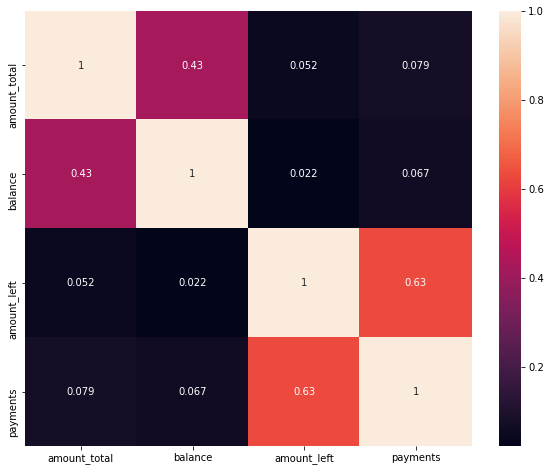

In [10]:
# Checking for multicollinearity
plt.figure(figsize=(10, 8))
ax = sns.heatmap(data.corr(), annot=True)
plt.show()

payments and amount_left have a rather high correlation, so we will include only one of them in the model

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


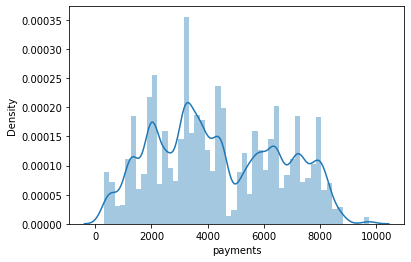

In [11]:
#sns.distplot(data['amount_total'])
#plt.show()

#sns.distplot(data['balance'])
#plt.show()

sns.distplot(data['payments'])
plt.show()

### Preprocessing the numerical variables

In [12]:
from sklearn.preprocessing import StandardScaler
data_num = data.select_dtypes(include = np.number).drop(columns = 'amount_left')
print(data_num.head())
# Standardizing data
transformer = StandardScaler().fit(data_num)
data_num_standardized = transformer.transform(data_num)
x = pd.DataFrame(data_num_standardized, columns = data_num.columns)
print(x.head())

   amount_total  balance  payments
0       44749.0  45549.0    3317.0
1        1000.0   1000.0    4399.0
2        1100.0   1100.0     609.0
3         700.0    700.0    1921.0
4         900.0    900.0    3492.0
   amount_total   balance  payments
0      3.147453 -0.018599 -0.471289
1     -0.582545 -1.769754  0.019231
2     -0.574019 -1.765823 -1.698947
3     -0.608123 -1.781547 -1.104158
4     -0.591071 -1.773685 -0.391953


/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


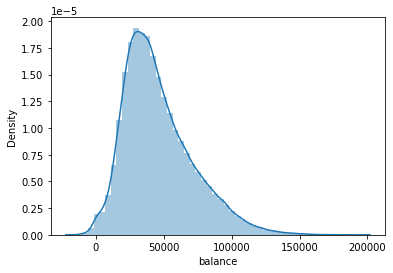

In [13]:
sns.distplot(data['balance'])
plt.show()

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


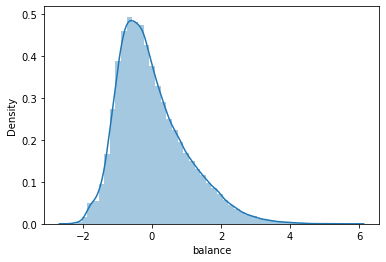

In [14]:
sns.distplot(x['balance'])
plt.show()

### Getting dummies for the categorical variables

In [15]:
from sklearn.preprocessing import OneHotEncoder
cat = data.select_dtypes(include = np.object).drop(columns = 'status')
enc = OneHotEncoder(drop = 'first')
categorical = pd.DataFrame(enc.fit_transform(cat).toarray(), columns = enc.get_feature_names())
categorical.head()

,x0_VYBER,x0_VYDAJ,x1_unknown,x1_vklad,x1_vyber,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_24,x3_36,x3_48,x3_60
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
categorical.sum(axis = 1)

0        2.0
1        2.0
2        3.0
3        2.0
4        2.0
        ... 
74359    3.0
74360    3.0
74361    3.0
74362    3.0
74363    3.0
Length: 74364, dtype: float64

In [17]:
y = data['status']
X = pd.concat((x, categorical), axis=1)
X.head()

,amount_total,balance,payments,x0_VYBER,x0_VYDAJ,x1_unknown,x1_vklad,x1_vyber,x2_sankc. urok,x2_sipo,x2_sluzby,x2_unknown,x2_urok,x2_uver,x3_24,x3_36,x3_48,x3_60
0,3.147453,-0.018599,-0.471289,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-0.582545,-1.769754,0.019231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.574019,-1.765823,-1.698947,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,-0.608123,-1.781547,-1.104158,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.591071,-1.773685,-0.391953,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Splitting into train and test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression(max_iter = 500).fit(X_train, y_train)

In [20]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806898406508438

In [21]:
y_test.value_counts()

A    25839
B     3907
Name: status, dtype: int64

In [22]:
pd.Series(predictions).value_counts()

A    29120
B      626
dtype: int64

What happened in terms of the classes?

### Decision Tree

In [23]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [24]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.9950917770456532

In [25]:
pd.Series(predictions).value_counts()

A    25819
B     3927
dtype: int64

In [26]:
decisiontree.feature_importances_

array([1.36649563e-02, 1.22687289e-01, 6.87654316e-01, 5.84855729e-04,
       1.82141197e-03, 8.29474506e-04, 1.78012786e-03, 1.58127951e-03,
       0.00000000e+00, 5.80249720e-04, 2.73486563e-06, 3.11387254e-04,
       0.00000000e+00, 1.36044870e-04, 8.11523011e-02, 3.97161720e-02,
       1.06627457e-02, 3.68346534e-02])

In [27]:
print(dict(zip(X.columns, decisiontree.feature_importances_)))

{'amount_total': 0.013664956272848463, 'balance': 0.12268728942193564, 'payments': 0.687654315796556, 'x0_VYBER': 0.0005848557293973858, 'x0_VYDAJ': 0.0018214119702302243, 'x1_unknown': 0.0008294745059364201, 'x1_vklad': 0.001780127863724589, 'x1_vyber': 0.0015812795052513127, 'x2_sankc. urok': 0.0, 'x2_sipo': 0.0005802497203148413, 'x2_sluzby': 2.734865626523367e-06, 'x2_unknown': 0.00031138725389238313, 'x2_urok': 0.0, 'x2_uver': 0.0001360448701313137, 'x3_24': 0.08115230111021894, 'x3_36': 0.03971617204724585, 'x3_48': 0.010662745669718964, 'x3_60': 0.03683465339697101}


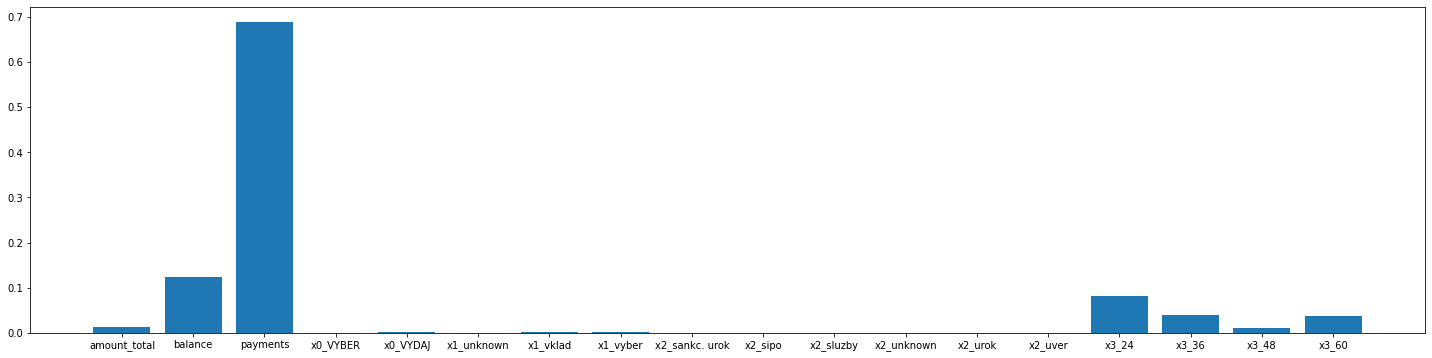

In [28]:
plt.rcParams['figure.figsize'] = [25, 6]
plt.bar(height = decisiontree.feature_importances_, x = X.columns)
plt.show()

### SVM

In [29]:
from sklearn.svm import SVC

#svm = SVC().fit(X_train, y_train)
#predictions = svm.predict(X_test)
#print(svm.score(X_test, y_test))
#print(pd.Series(predictions).value_counts())

### K-Nearest Neighbors

In [30]:
from sklearn.neighbors import KNeighborsClassifier

#nearest_neighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
#predictions = nearest_neighbors.predict(X_test)
#print(nearest_neighbors.score(X_test, y_test))
#print(pd.Series(predictions).value_counts())

In [31]:
#help(KNeighborsClassifier)

## Supervised Learning: Regression

In [32]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
# SVR
from sklearn.svm import SVR
# KNN
from sklearn.neighbors import KNeighborsRegressor

## Model Evaluation

### Creating the Confusion Matrix

In [33]:
from sklearn.linear_model import LogisticRegression
logisticr = LogisticRegression().fit(X_train, y_train)

In [34]:
predictions = logisticr.predict(X_test)
logisticr.score(X_test, y_test)

0.8806898406508438

In [35]:
pd.Series(predictions).value_counts()

A    29120
B      626
dtype: int64

In [36]:
from sklearn.metrics import confusion_matrix
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25705   134]
 [ 3415   492]]


<AxesSubplot:>

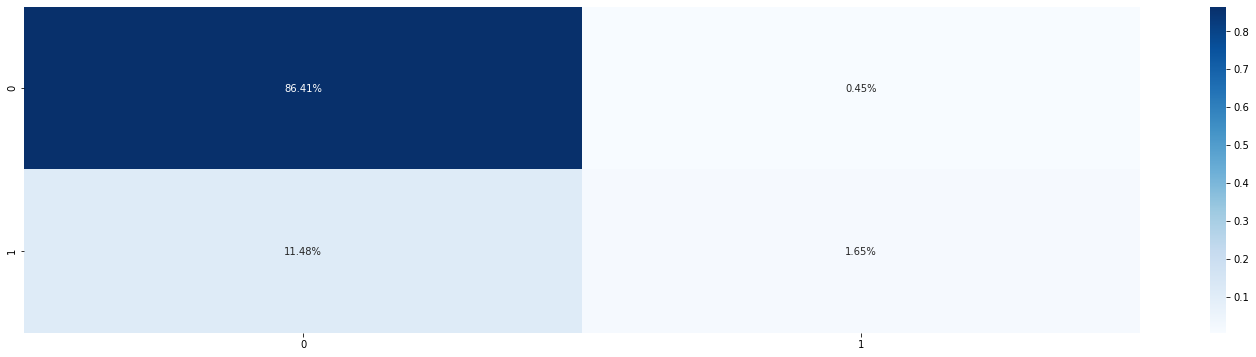

In [37]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

#### Precision, Recall and the F1 Score

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score
# We need to assign which is the 'positive class'. Here, we are trying to predict whether a customer will run into
# problems repaying their loan. So Status B is the 'positive' class (meaning credit problems = True)
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.7859424920127795
0.12592782185820323
0.2170747849106552


In [39]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, predictions)

0.5603709313246278

In [40]:
# balanced accuracy score: average of recall for the two classes
print(recall_score(y_test, predictions, pos_label='A'))
print(recall_score(y_test, predictions, pos_label='B'))

0.9948140407910523
0.12592782185820323


In [41]:
#help(balanced_accuracy_score)

#### ROC and AUC analysis

In [42]:
from sklearn.metrics import roc_curve, roc_auc_score
#help(roc_curve)

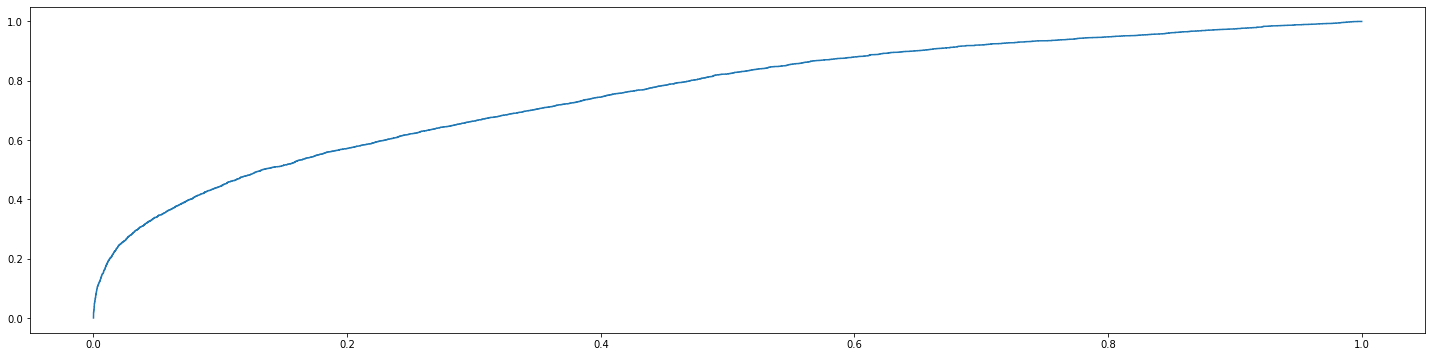

In [43]:
# we need to calculate class probabilities!
y_pred_proba = logisticr.predict_proba(X_test)[:,1]
y_pred_proba
fpr, tpr, kittycat = roc_curve(y_test, y_pred_proba, pos_label='B') 
plt.plot(fpr,tpr)

In [44]:
logisticr.predict(X_test)

array(['A', 'A', 'A', ..., 'A', 'A', 'A'], dtype=object)

In [45]:
logisticr.predict_proba(X_test)#[:,1]

array([[0.98769117, 0.01230883],
       [0.85790584, 0.14209416],
       [0.75955909, 0.24044091],
       ...,
       [0.93178667, 0.06821333],
       [0.83162412, 0.16837588],
       [0.79740812, 0.20259188]])

In [46]:
#help(logisticr.predict_proba)

In [47]:
#help(roc_auc_score)

In [48]:
roc_auc_score(y_test, y_pred_proba)

0.7585273887872525

### Repeating all the steps for a Decision Tree for comparison:

In [49]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)

In [50]:
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.995125395011094

In [51]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25756    83]
 [   62  3845]]


<AxesSubplot:>

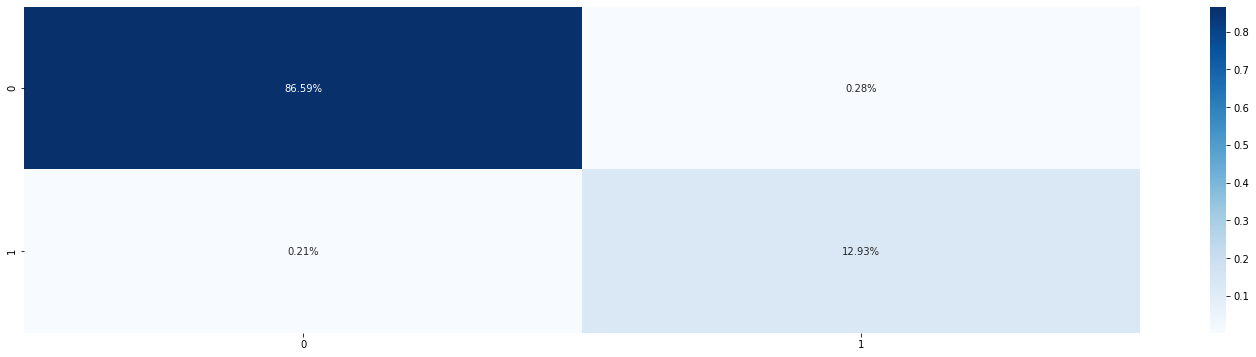

In [52]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [53]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.9788696537678208
0.9841310468390069
0.9814932992980216


In [54]:
balanced_accuracy_score(y_test, predictions)

0.9904594241122546

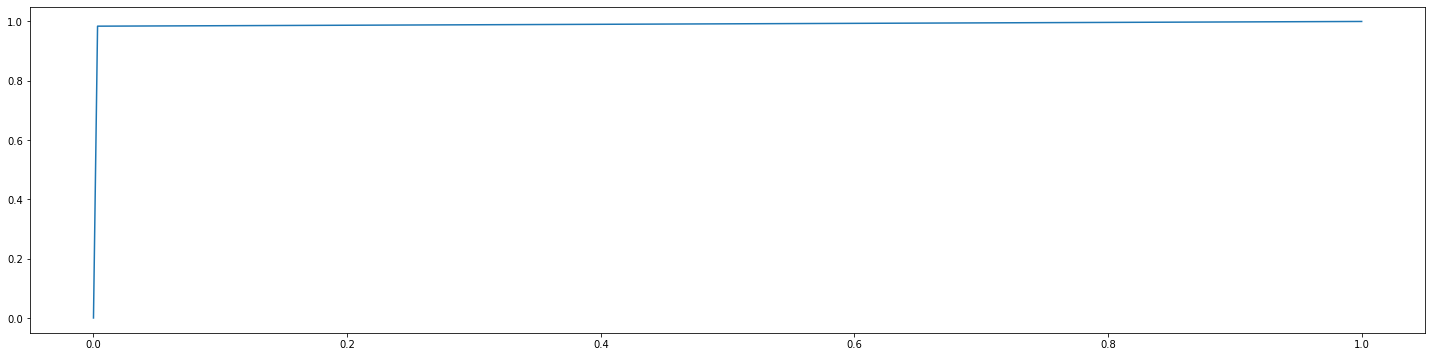

In [55]:
y_pred_proba = decisiontree.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label='B') 
# we need to assign which one is the "positive" (1) category
plt.plot(fpr,tpr)

In [56]:
roc_auc_score(y_test, y_pred_proba)

0.9904594241122547

### Hyperparameter Tuning

Can we do even better?

In [57]:
from sklearn.model_selection import GridSearchCV
help(GridSearchCV)

Help on class GridSearchCV in module sklearn.model_selection._search:

class GridSearchCV(BaseSearchCV)
 |  GridSearchCV(estimator, param_grid, *, scoring=None, n_jobs=None, iid='deprecated', refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)
 |  
 |  Exhaustive search over specified parameter values for an estimator.
 |  
 |  Important members are fit, predict.
 |  
 |  GridSearchCV implements a "fit" and a "score" method.
 |  It also implements "predict", "predict_proba", "decision_function",
 |  "transform" and "inverse_transform" if they are implemented in the
 |  estimator used.
 |  
 |  The parameters of the estimator used to apply these methods are optimized
 |  by cross-validated grid-search over a parameter grid.
 |  
 |  Read more in the :ref:`User Guide <grid_search>`.
 |  
 |  Parameters
 |  ----------
 |  estimator : estimator object.
 |      This is assumed to implement the scikit-learn estimator interface.
 |      Either e

In [58]:
help(DecisionTreeClassifier)

Help on class DecisionTreeClassifier in module sklearn.tree._classes:

class DecisionTreeClassifier(sklearn.base.ClassifierMixin, BaseDecisionTree)
 |  DecisionTreeClassifier(*, criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, class_weight=None, presort='deprecated', ccp_alpha=0.0)
 |  
 |  A decision tree classifier.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"gini", "entropy"}, default="gini"
 |      The function to measure the quality of a split. Supported criteria are
 |      "gini" for the Gini impurity and "entropy" for the information gain.
 |  
 |  splitter : {"best", "random"}, default="best"
 |      The strategy used to choose the split at each node. Supported
 |      strategies are "best" to choose the best split and "random" to choos

In [61]:
param_grid = {"criterion": ["gini", "entropy"],
                 "splitter": ["best", "random"],
                 "max_depth": [3, 10, None]}

tune = GridSearchCV(DecisionTreeClassifier(),
                       param_grid=param_grid,
                       cv=3) # cv=cross-validation (see below)

tune.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 10, None],
                         'splitter': ['best', 'random']})

In [62]:
tune.best_params_

{'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}

In [63]:
decisiontree_opt = DecisionTreeClassifier(**tune.best_params_).fit(X_train, y_train)

In [64]:
predictions = decisiontree_opt.predict(X_test)
decisiontree_opt.score(X_test, y_test)

0.9959658441471122

In [65]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[25774    65]
 [   55  3852]]


<AxesSubplot:>

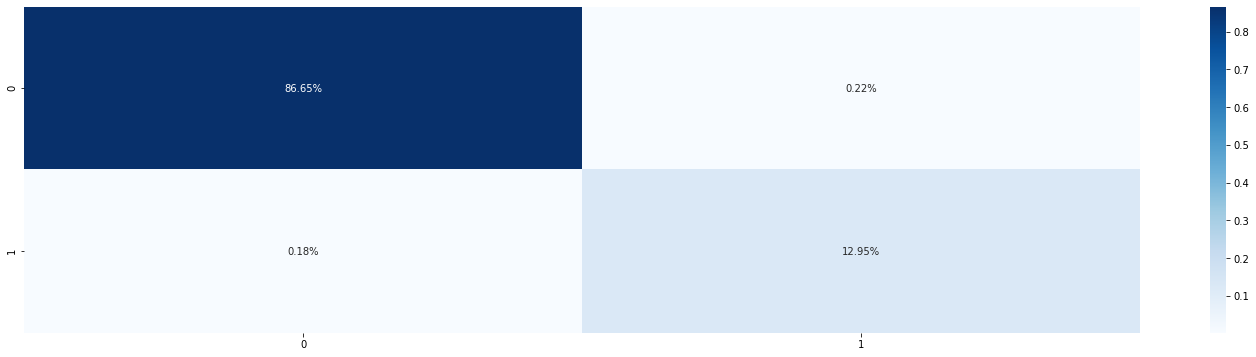

In [66]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [67]:
print(precision_score(y_test, predictions, pos_label='B'))
print(recall_score(y_test, predictions, pos_label='B'))
print(f1_score(y_test, predictions, pos_label='B'))

0.9834056676027572
0.9859227028410545
0.9846625766871167


In [68]:
balanced_accuracy_score(y_test, predictions)

0.9917035628064168

#### We can even extend this to multiple algorithms!

In [69]:
# the models that you want to compare
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'LogisticRegression': LogisticRegression()
}

# the optimisation parameters for each of the models that you have picked above (check their help functions!!)
params = {
    'DecisionTreeClassifier':
        {'criterion': ['gini', 'entropy'],
                 'splitter': ['best', 'random'],
                 'max_depth': [3, 10, None]
        },
    'LogisticRegression': {
        'solver': ['newton-cg', 'sag', 'lbfgs'],
        'multi_class': ['ovr', 'multinomial']
        }  
}

In [70]:
for model in models.keys():
    tune = GridSearchCV(estimator=models[model], param_grid=params[model], cv=3)
    tune.fit(X_train, y_train)
    print("Best estimator is {}".format(tune.best_estimator_))
    print("Best parameters are: {}".format(tune.best_params_))
    print("Best score is: {}".format(tune.best_score_))

Best estimator is DecisionTreeClassifier(criterion='entropy')
Best parameters are: {'criterion': 'entropy', 'max_depth': None, 'splitter': 'best'}
Best score is: 0.9953157973538218
Best estimator is LogisticRegression(multi_class='ovr')
Best parameters are: {'multi_class': 'ovr', 'solver': 'lbfgs'}
Best score is: 0.8798691044700852


### Cross Validation

Is our split into training and test set biased?

In [71]:
from sklearn.model_selection import cross_validate
help(cross_validate)

Help on function cross_validate in module sklearn.model_selection._validation:

cross_validate(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', return_train_score=False, return_estimator=False, error_score=nan)
    Evaluate metric(s) by cross-validation and also record fit/score times.
    
    Read more in the :ref:`User Guide <multimetric_cross_validation>`.
    
    Parameters
    ----------
    estimator : estimator object implementing 'fit'
        The object to use to fit the data.
    
    X : array-like of shape (n_samples, n_features)
        The data to fit. Can be for example a list, or an array.
    
    y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
        The target variable to try to predict in the case of
        supervised learning.
    
    groups : array-like of shape (n_samples,), default=None
        Group labels for the samples used while splitt

In [72]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")

{'fit_time': array([0.13111663, 0.12148404, 0.11284566, 0.12016702, 0.11987305]),
 'score_time': array([0.02835035, 0.03087282, 0.02821207, 0.0287621 , 0.02805614]),
 'test_score': array([0.98509776, 0.98752849, 0.99017759, 0.99072629, 0.98801086])}

In [73]:
cross_validate(DecisionTreeClassifier(),
               X_train,
               y_train,
               scoring="balanced_accuracy")["test_score"].mean() # do this instead of running the cell until best result!

0.9879974548105789

## Pretending this was a multiclass problem

In [74]:
y_train[:5000] = 'C'
y_test[:5000] = 'C'

In [75]:
decisiontree = DecisionTreeClassifier().fit(X_train, y_train)
predictions = decisiontree.predict(X_test)
decisiontree.score(X_test, y_test)

0.7468567202312916

In [76]:
cf_matrix = confusion_matrix(y_test, predictions)
print(cf_matrix)

[[18862    58  2602]
 [   51  2771   402]
 [ 3797   620   583]]


In [77]:
help(precision_score)

Help on function precision_score in module sklearn.metrics._classification:

precision_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')
    Compute the precision
    
    The precision is the ratio ``tp / (tp + fp)`` where ``tp`` is the number of
    true positives and ``fp`` the number of false positives. The precision is
    intuitively the ability of the classifier not to label as positive a sample
    that is negative.
    
    The best value is 1 and the worst value is 0.
    
    Read more in the :ref:`User Guide <precision_recall_f_measure_metrics>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : list, optional
        The set of labels to include when ``average != 'binary

In [78]:
print(precision_score(y_test, predictions, average = 'macro')) # macro it will do precision for each class and then average
print(recall_score(y_test, predictions, average = 'macro')) 
print(f1_score(y_test, predictions, average = 'macro'))

0.5988372899326966
0.6174989512184005
0.6063881238735175


In [80]:
# if None will just return the score for each class individually
print(precision_score(y_test, predictions, average = None))

[0.83055923 0.80342128 0.16253136]


In [79]:
balanced_accuracy_score(y_test, predictions)

0.6174989512184005